Abstract: This data set contains the distribution of words in the full text of the NIPS conference papers published from 1987 to 2015.

Data Set Information:

The dataset is in the form of a 11463 x 5812 matrix of word counts, containing 11463 words and 5811 NIPS conference papers (the first column contains the list of words). Each column contains the number of times each word appears in the corresponding document. The names of the columns give information about each document and its timestamp in the following format: Xyear_paperID. 

The matrix of word counts was obtained using the R package 'tmâ€ to process the raw .txt files of the full text of the NIPS conference papers published between 1987 and 2015. The document-term matrix was constructed after tokenization, removal of stopwords and truncation of the vocabulary by only keeping words occurring more than 50 times.


Attribute Information:

Column 1: 'X' (list of words) 
Columns 2-5812: 'Xyear_ID' (timestamp and paper ID)

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib notebook

## Criando a transposta do _dataset_

In [2]:
dataset = pd.read_csv('NIPS_1987-2015.csv')
dataset = dataset.transpose()
new_header = dataset.iloc[0]
dataset = dataset.iloc[1:]
dataset.columns = new_header
dataset.to_csv('NIPS_1987-2015_transpose.csv')

In [3]:
dataset = pd.read_csv('NIPS_1987-2015_transpose.csv')
dataset.head(5)

,Unnamed: 0,abalone,abbeel,abbott,abbreviate,abbreviated,abc,abeles,abernethy,abilistic,...,zhou,zhu,zien,zilberstein,zones,zoo,zoom,zou,zoubin,zurich
0,1987_1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1987_2,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1987_3,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1987_4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,1987_5,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [7]:
maxx = dataset.max()
maxx = maxx[1:] # Retirando a coluna Xyear_ID

In [20]:


n, bins, patches = plt.hist(maxx, 40, log=True, color=['green']*len(maxx), ec='black', alpha=0.75, align='mid')
plt.title('Histograma BoW', fontsize=20)
plt.xlabel('Maximo encontrado', fontsize=12)
plt.xticks(bins, rotation=90)
plt.ylabel('Frequência', fontsize=12)
ax = plt.gca()
ax.grid(axis='y', linestyle='--', linewidth=1)
plt.show()
plt.close()
print(n, bins)

ValueError: color kwarg must have one color per dataset

In [8]:
sorted_columns = maxx.sort_values(ascending=True)
drop_columns = []

for i in range(len(sorted_columns)):
    drop_columns.append(sorted_columns.axes[0][i])
    
    if sorted_columns[i] > 10:
        break
        
len(drop_columns)

4728

In [9]:
dataset_old = dataset.copy()
dataset = dataset.drop(drop_columns, axis=1)

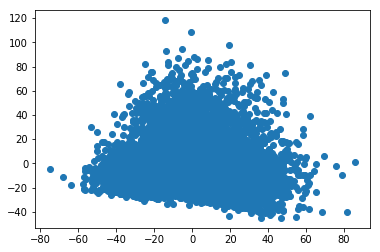

In [25]:
from sklearn.decomposition import PCA

X = dataset
X = X.iloc[:, 1:]

pca = PCA(n_components=2).fit(X)
X_PCA = pca.transform(X)
plt.scatter(X_PCA[:,0], X_PCA[:,1])
plt.show()  

In [15]:
pca.explained_variance_ratio_

array([ 0.03544668,  0.03199579])

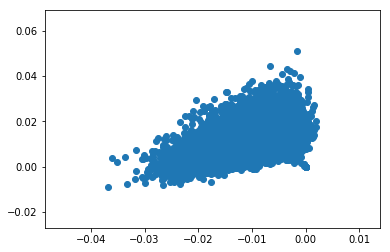

In [16]:
from sklearn.decomposition import SparsePCA

X = dataset
X = X.iloc[:, 1:]

spca = SparsePCA(n_components=2).fit(X)
X_SPCA = spca.transform(X)
plt.scatter(X_SPCA[:, 0], X_SPCA[:, 1])
plt.show()

In [54]:
from sklearn.manifold import TSNE

X = dataset
X = X.iloc[:, 1:]
X_tsne = TSNE(n_components=2).fit_transform(X)
plt.scatter(X_tsne[:, 0], X_tsne[:, 1])
plt.show()

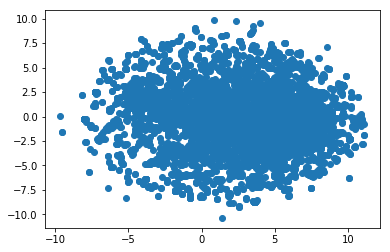

In [55]:
plt.show()

it: 0, stress 531243717615.0
it: 1, stress 97962839765.7
it: 2, stress 88056978464.8
it: 3, stress 82050324014.8
it: 4, stress 78293153859.0
it: 5, stress 75875011232.9
it: 6, stress 74310753079.3
it: 7, stress 73304962083.7
it: 8, stress 72645486264.3
it: 9, stress 72203108110.2
it: 10, stress 71898046782.0
it: 11, stress 71683820500.5
it: 12, stress 71531172134.5
it: 13, stress 71421763307.6
it: 14, stress 71343443922.7
it: 15, stress 71287244376.1
it: 16, stress 71246457615.8
it: 17, stress 71216115876.2
it: 18, stress 71192998243.3
it: 19, stress 71174907907.4
it: 20, stress 71160396585.0
it: 21, stress 71148598673.0
it: 22, stress 71138916145.0
it: 23, stress 71130879736.8
it: 24, stress 71124201542.2
it: 25, stress 71118637224.0
it: 26, stress 71113993514.9
it: 27, stress 71110119405.6
it: 28, stress 71106917314.9
it: 29, stress 71104250629.9
it: 30, stress 71102018174.6
it: 31, stress 71100145871.8
it: 32, stress 71098568149.2
it: 33, stress 71097215013.1
it: 34, stress 71096043

it: 277, stress 70360628055.5
it: 278, stress 70352257948.2
it: 279, stress 70343821670.5
it: 280, stress 70335325034.4
it: 281, stress 70326773069.8
it: 282, stress 70318176395.5
it: 283, stress 70309539710.9
it: 284, stress 70300849656.1
it: 285, stress 70292117455.7
it: 286, stress 70283354144.1
it: 287, stress 70274559804.7
it: 288, stress 70265736850.4
it: 289, stress 70256866501.1
it: 290, stress 70247961018.9
it: 291, stress 70239027079.1
it: 292, stress 70230067780.8
it: 293, stress 70221069363.1
it: 294, stress 70212032807.0
it: 295, stress 70202958759.4
it: 296, stress 70193836141.1
it: 297, stress 70184662264.2
it: 298, stress 70175429610.7
it: 299, stress 70166148454.1
it: 0, stress 531247381558.0
it: 1, stress 98298427768.5
it: 2, stress 88308179200.4
it: 3, stress 82189728271.2
it: 4, stress 78437516421.0
it: 5, stress 76001806557.5
it: 6, stress 74406557826.4
it: 7, stress 73354298741.9
it: 8, stress 72664176821.4
it: 9, stress 72206200617.0
it: 10, stress 71889215493.6


it: 254, stress 71016951640.2
it: 255, stress 71016028894.3
it: 256, stress 71015094648.1
it: 257, stress 71014148648.5
it: 258, stress 71013190225.2
it: 259, stress 71012218604.6
it: 260, stress 71011234573.9
it: 261, stress 71010237409.7
it: 262, stress 71009226393.4
it: 263, stress 71008200986.6
it: 264, stress 71007161390.7
it: 265, stress 71006107791.7
it: 266, stress 71005039207.0
it: 267, stress 71003954369.4
it: 268, stress 71002854510.6
it: 269, stress 71001740890.3
it: 270, stress 71000612400.1
it: 271, stress 70999469044.6
it: 272, stress 70998309766.8
it: 273, stress 70997135898.6
it: 274, stress 70995947534.1
it: 275, stress 70994745242.7
it: 276, stress 70993528161.1
it: 277, stress 70992295691.3
it: 278, stress 70991047880.4
it: 279, stress 70989784266.4
it: 280, stress 70988504865.6
it: 281, stress 70987209583.1
it: 282, stress 70985897592.6
it: 283, stress 70984567047.6
it: 284, stress 70983217939.7
it: 285, stress 70981849471.6
it: 286, stress 70980463155.5
it: 287, s

it: 231, stress 70963916102.2
it: 232, stress 70962080358.0
it: 233, stress 70960218039.9
it: 234, stress 70958329535.6
it: 235, stress 70956414376.6
it: 236, stress 70954473882.7
it: 237, stress 70952507393.3
it: 238, stress 70950513425.9
it: 239, stress 70948494542.8
it: 240, stress 70946451868.1
it: 241, stress 70944384367.5
it: 242, stress 70942293171.1
it: 243, stress 70940178358.4
it: 244, stress 70938037676.0
it: 245, stress 70935870059.0
it: 246, stress 70933672672.2
it: 247, stress 70931444890.5
it: 248, stress 70929188428.5
it: 249, stress 70926905289.4
it: 250, stress 70924591890.2
it: 251, stress 70922244303.4
it: 252, stress 70919862205.2
it: 253, stress 70917445525.4
it: 254, stress 70914995321.3
it: 255, stress 70912514198.0
it: 256, stress 70910005571.4
it: 257, stress 70907466399.0
it: 258, stress 70904894191.9
it: 259, stress 70902287556.6
it: 260, stress 70899645265.6
it: 261, stress 70896970684.7
it: 262, stress 70894261468.8
it: 263, stress 70891518054.4
it: 264, s

it: 208, stress 70972522222.8
it: 209, stress 70970475991.8
it: 210, stress 70968394655.3
it: 211, stress 70966274835.1
it: 212, stress 70964119559.2
it: 213, stress 70961929767.4
it: 214, stress 70959706090.1
it: 215, stress 70957449228.4
it: 216, stress 70955157947.6
it: 217, stress 70952829877.5
it: 218, stress 70950460424.5
it: 219, stress 70948045466.4
it: 220, stress 70945585894.0
it: 221, stress 70943081683.9
it: 222, stress 70940535260.5
it: 223, stress 70937941957.3
it: 224, stress 70935303491.2
it: 225, stress 70932620454.5
it: 226, stress 70929892391.3
it: 227, stress 70927117924.9
it: 228, stress 70924298185.9
it: 229, stress 70921432003.0
it: 230, stress 70918519600.5
it: 231, stress 70915561207.2
it: 232, stress 70912557300.3
it: 233, stress 70909506988.1
it: 234, stress 70906405121.5
it: 235, stress 70903252645.5
it: 236, stress 70900050173.6
it: 237, stress 70896799950.2
it: 238, stress 70893499135.4
it: 239, stress 70890143998.0
it: 240, stress 70886732706.9
it: 241, s

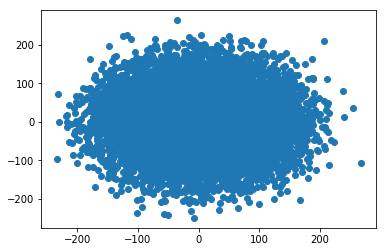

In [13]:
from sklearn.manifold import MDS

X = dataset
X = X.iloc[:, 1:]

X_mds = MDS(n_components=2, verbose=2).fit_transform(X)
plt.scatter(X_mds[:, 0], X_mds[:, 1])
plt.show()

In [48]:
dataset_2015 = []
for row in range(5408, len(dataset_old.values)):
    dataset_2015.append(dataset_old.iloc[row, :])

dataset_2015 = pd.DataFrame(data=dataset_2015)
dataset_2015.shape

(403, 11464)

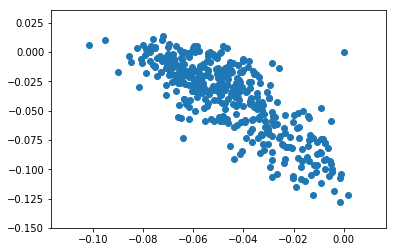

In [42]:
from sklearn.decomposition import SparsePCA

spca = SparsePCA(n_components=2).fit(dataset_2015.iloc[:, 1:])
X_SPCA = spca.transform(dataset_2015.iloc[:, 1:])
plt.scatter(X_SPCA[:, 0], X_SPCA[:, 1])
plt.show()

# Redução de Dimensionalidade por LSA

In [49]:
dataset_2015 = dataset_2015.drop('Unnamed: 0', axis=1)
dataset_2015.head()

,abalone,abbeel,abbott,abbreviate,abbreviated,abc,abeles,abernethy,abilistic,abilities,...,zhou,zhu,zien,zilberstein,zones,zoo,zoom,zou,zoubin,zurich
5408,0,0,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
5409,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
5410,0,0,0,0,0,0,0,0,0,0,...,0,4,0,0,0,0,0,0,1,0
5411,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5412,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [50]:
from sklearn.decomposition import TruncatedSVD
from sklearn.preprocessing import Normalizer
from sklearn.pipeline import make_pipeline
from time import time

t0 = time()

svd = TruncatedSVD(2)
normalizer = Normalizer(copy=False)
lsa = make_pipeline(svd, normalizer)

X = lsa.fit_transform(dataset_2015)

print('Done %fs' % (time() - t0))

explained_variance = svd.explained_variance_ratio_.sum()
print("Explained variance of the SVD step: {}%".format(
    int(explained_variance * 100)))

Done 0.199114s
Explained variance of the SVD step: 5%


<IPython.core.display.Javascript object>


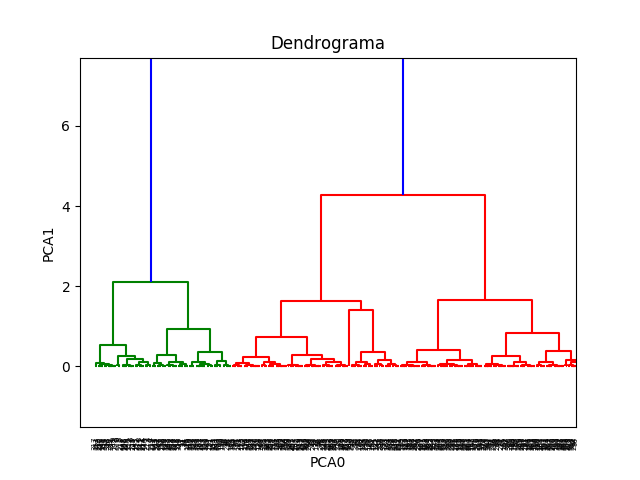

In [56]:
import scipy.cluster.hierarchy as sch
dendrogram = sch.dendrogram(sch.linkage(X, method = 'ward'))
plt.title('Dendrograma')
plt.xlabel('PCA0')
plt.ylabel('PCA1')
plt.show()

<IPython.core.display.Javascript object>


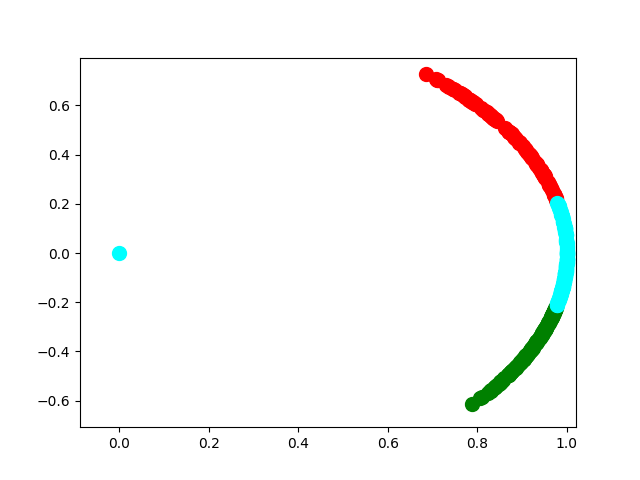

In [57]:
from sklearn.cluster import AgglomerativeClustering
hc = AgglomerativeClustering(n_clusters = 3, affinity = 'euclidean',
                            linkage = 'ward')
y_hc = hc.fit_predict(X)

plt.scatter(X[y_hc == 0, 0], X[y_hc == 0, 1], s = 100, c = 'red')
plt.scatter(X[y_hc == 1, 0], X[y_hc == 1, 1], s = 100, c = 'green')
plt.scatter(X[y_hc == 2, 0], X[y_hc == 2, 1], s = 100, c = 'cyan')
plt.show()

<IPython.core.display.Javascript object>


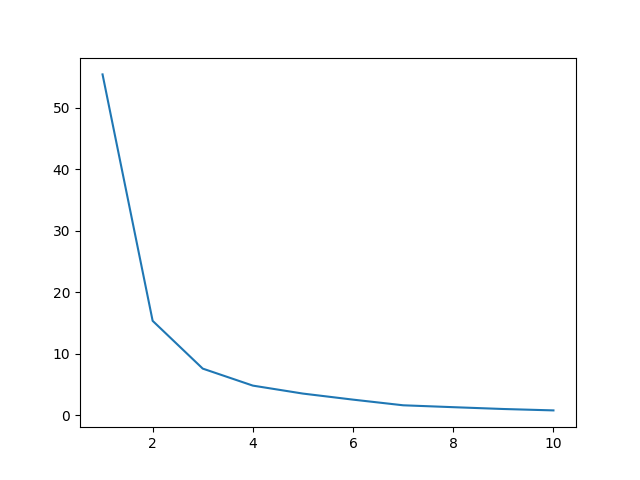

In [58]:
from sklearn.cluster import KMeans
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', max_iter = 300,
                   n_init = 10)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)

plt.plot(range(1, 11), wcss)
plt.show()

<IPython.core.display.Javascript object>


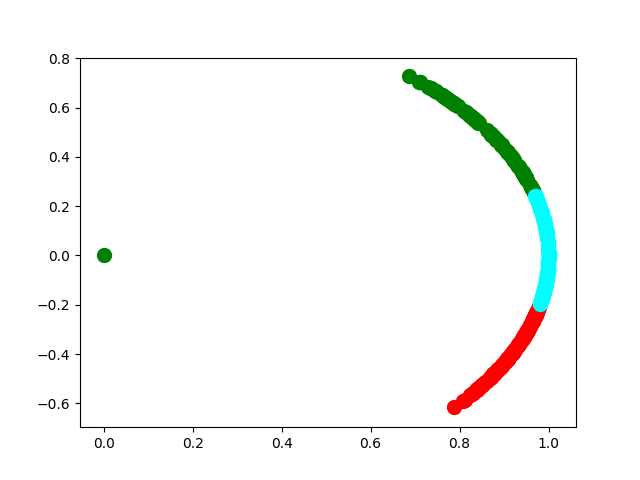

In [59]:
kmeans = KMeans(n_clusters = 3, init = 'k-means++', max_iter = 300,
               n_init = 10)
y_kmeans = kmeans.fit_predict(X)

plt.scatter(X[y_kmeans == 0, 0], X[y_kmeans == 0, 1], s = 100, c = 'red')
plt.scatter(X[y_kmeans == 1, 0], X[y_kmeans == 1, 1], s = 100, c = 'green')
plt.scatter(X[y_kmeans == 2, 0], X[y_kmeans == 2, 1], s = 100, c = 'cyan')
plt.show()

# Todo o dataset

In [10]:
y = dataset_old.iloc[:, 0]
dataset_old = dataset_old.drop(dataset_old.columns[0], axis = 1)

In [76]:
from sklearn.decomposition import TruncatedSVD
from sklearn.preprocessing import Normalizer
from sklearn.pipeline import make_pipeline
from time import time

t0 = time()

svd = TruncatedSVD(2)
normalizer = Normalizer(copy=False)
lsa = make_pipeline(svd, normalizer)

X = lsa.fit_transform(dataset_old)

print('Done %fs' % (time() - t0))

explained_variance = svd.explained_variance_ratio_.sum()
print("Explained variance of the SVD step: {}%".format(
    int(explained_variance * 100)))

Done 2.434013s
Explained variance of the SVD step: 5%


<IPython.core.display.Javascript object>


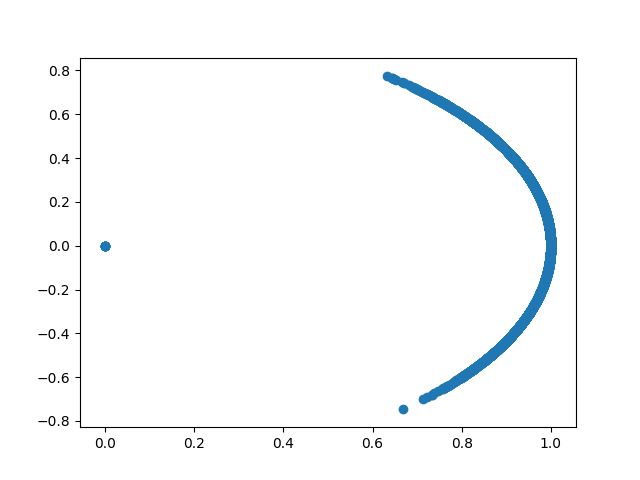

In [80]:
plt.scatter(X[:, 0], X[:, 1])
plt.show()

<IPython.core.display.Javascript object>


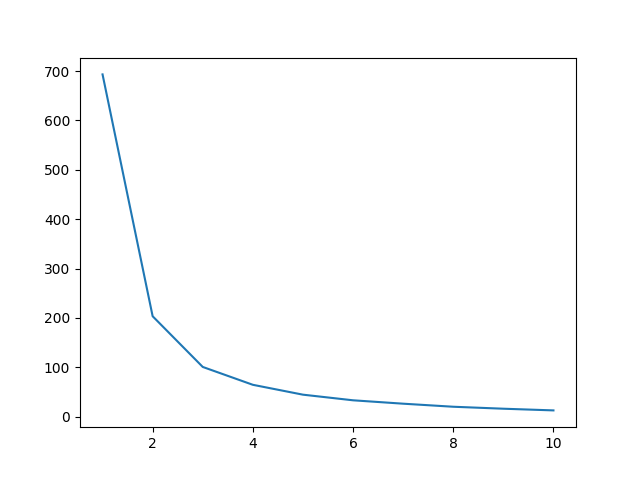

In [77]:
from sklearn.cluster import KMeans
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', max_iter = 300,
                   n_init = 10)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)

plt.plot(range(1, 11), wcss)
plt.show()

<IPython.core.display.Javascript object>


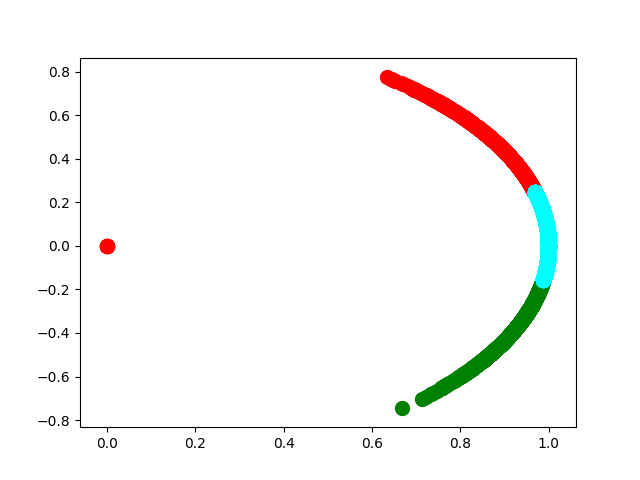

In [78]:
kmeans = KMeans(n_clusters = 3, init = 'k-means++', max_iter = 300,
               n_init = 10)
y_kmeans = kmeans.fit_predict(X)

plt.scatter(X[y_kmeans == 0, 0], X[y_kmeans == 0, 1], s = 100, c = 'red')
plt.scatter(X[y_kmeans == 1, 0], X[y_kmeans == 1, 1], s = 100, c = 'green')
plt.scatter(X[y_kmeans == 2, 0], X[y_kmeans == 2, 1], s = 100, c = 'cyan')
plt.show()

In [79]:
dataset_old.shape

(5811, 11462)

<IPython.core.display.Javascript object>


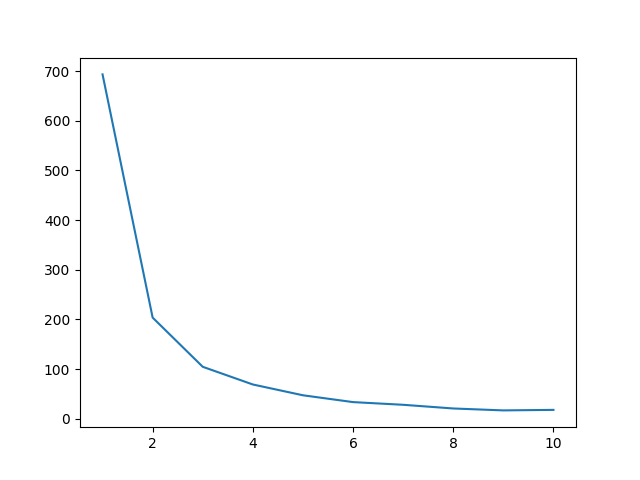

In [83]:
from sklearn.cluster import MiniBatchKMeans
wcss = []
for i in range(1, 11):
    km = MiniBatchKMeans(n_clusters=i, init='k-means++',
                             n_init=1, init_size=1000, batch_size=1000)
    km.fit(X)
    wcss.append(km.inertia_)

plt.plot(range(1, 11), wcss)
plt.show()

<IPython.core.display.Javascript object>


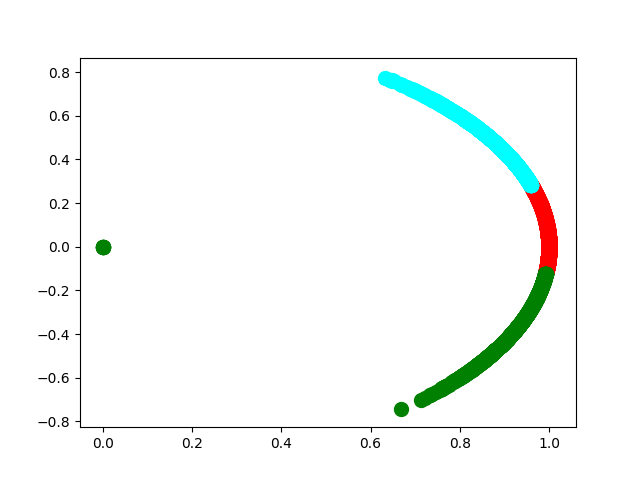

In [84]:
kmeans = MiniBatchKMeans(n_clusters=3, init='k-means++',
                             n_init=1, init_size=1000, batch_size=1000)
y_kmeans = kmeans.fit_predict(X)

plt.scatter(X[y_kmeans == 0, 0], X[y_kmeans == 0, 1], s = 100, c = 'red')
plt.scatter(X[y_kmeans == 1, 0], X[y_kmeans == 1, 1], s = 100, c = 'green')
plt.scatter(X[y_kmeans == 2, 0], X[y_kmeans == 2, 1], s = 100, c = 'cyan')
plt.show()

<IPython.core.display.Javascript object>


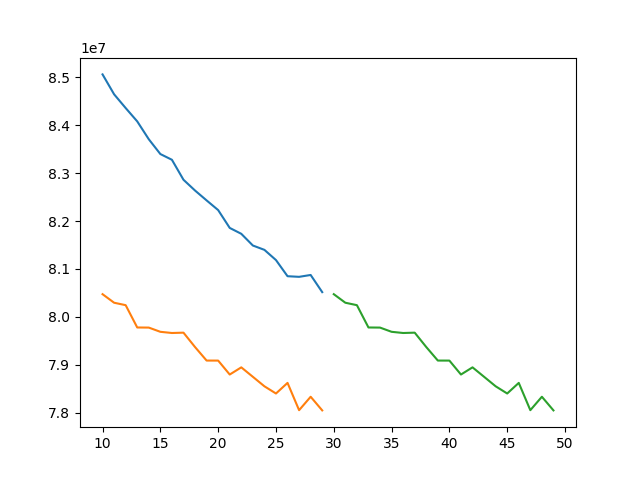

In [86]:
from sklearn.cluster import KMeans
wcss = []
for i in range(10, 30):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', max_iter = 300,
                   n_init = 10)
    kmeans.fit(dataset_old)
    wcss.append(kmeans.inertia_)

plt.plot(range(10, 30), wcss)
plt.show()

<IPython.core.display.Javascript object>


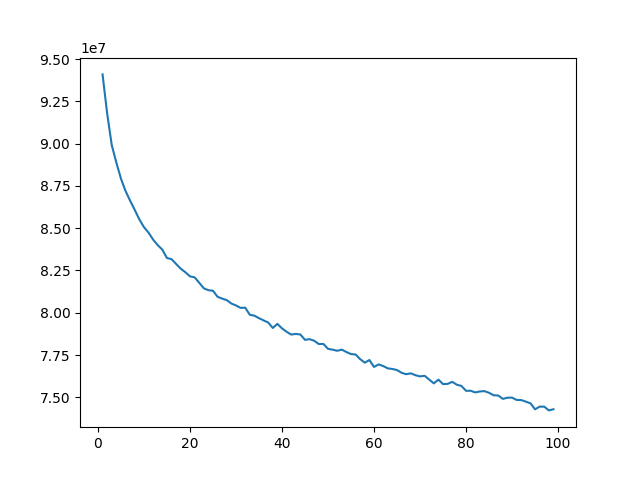

In [11]:
from sklearn.cluster import KMeans
wcss = []
start = 1
end = 100
for i in range(start, end):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', max_iter = 300,
                   n_init = 10, n_jobs = -1)
    kmeans.fit(dataset_old)
    wcss.append(kmeans.inertia_)

plt.plot(range(start, end), wcss)
plt.show()

<IPython.core.display.Javascript object>


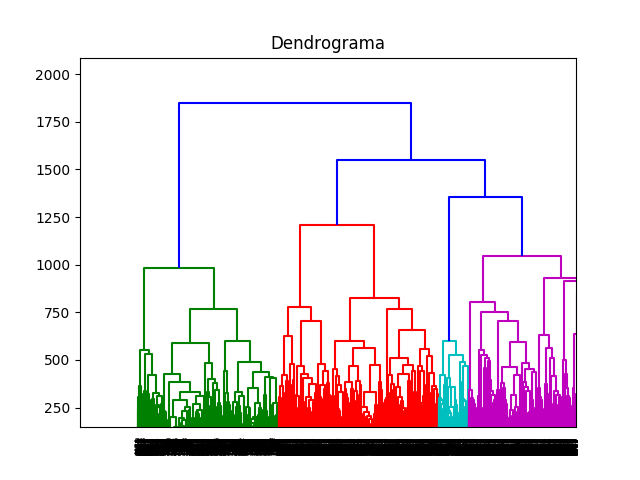

In [12]:
from sklearn.cluster import KMeans
wcss = []
start = 1000
end = 1010
for i in range(start, end):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', max_iter = 300,
                   n_init = 10, n_jobs = -1)
    kmeans.fit(dataset_old)
    wcss.append(kmeans.inertia_)

plt.plot(range(start, end), wcss)
plt.show()

<IPython.core.display.Javascript object>


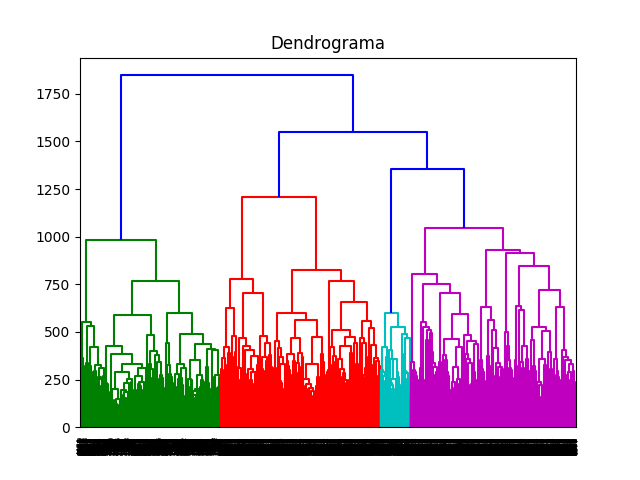

In [14]:
import scipy.cluster.hierarchy as sch
dendrogram = sch.dendrogram(sch.linkage(dataset_old, method = 'ward'))
plt.title('Dendrograma')
plt.show()